Epoch 0, MSE: 224.7463
Epoch 100, MSE: 6.6131
Epoch 200, MSE: 2.7838
Epoch 300, MSE: 2.7074
Epoch 400, MSE: 2.7052
Epoch 500, MSE: 2.7051
Epoch 600, MSE: 2.7051
Epoch 700, MSE: 2.7051
Epoch 800, MSE: 2.7051
Epoch 900, MSE: 2.7051

Paramètres du modèle:
Biais: 14.1000
TV: 3.7642
Radio: 2.7923
Newspaper: 0.0560

MSE: 3.1741
R²: 0.8994


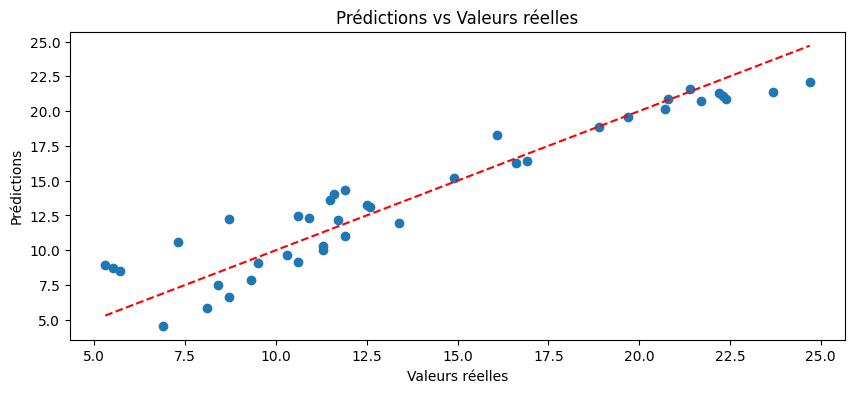

In [10]:
# Régression linéaire from scratch - Problème Advertising

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("../Advertising.csv", index_col=0)
X = df.iloc[:, :-1].values  # Features: TV, Radio, Newspaper
y = df.iloc[:, -1].values   # Target: Sales

# Division des données: train/test
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    indices = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(indices)
    test_count = int(n * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Normalisation des features
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train, mean, std = normalize(X_train)
X_test = (X_test - mean) / std

# Entraînement du modèle par descente de gradient
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    W = np.zeros(n_features)
    bias = 0
    mse_history = []

    for epoch in range(epochs):
        # Prédictions avec les paramètres actuels
        y_pred = bias + np.dot(X, W)
        
        # Calcul de l'erreur
        error = y - y_pred
        mse = np.mean(error ** 2)
        mse_history.append(mse)
        
        # Calcul des gradients
        dW = -(2/n_samples) * np.dot(X.T, error)
        db = -(2/n_samples) * np.sum(error)
        
        # Mise à jour des paramètres
        W -= learning_rate * dW
        bias -= learning_rate * db
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, MSE: {mse:.4f}")
    
    return bias, W, mse_history

# Entraînement
bias, W, mse_history = gradient_descent(X_train, y_train)

# Prédictions
y_pred = bias + np.dot(X_test, W)

# Évaluation
mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print("\nParamètres du modèle:")
print(f"Biais: {bias:.4f}")
features = ['TV', 'Radio', 'Newspaper']
for i, w in enumerate(W):
    print(f"{features[i]}: {w:.4f}")

print(f"\nMSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Visualisation
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs réelles')
plt.show()